# Suicide analysis by Gender and Age range 55-74



## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:

#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7cZKv6kGH2C3KZ4MPIyvg2_8JRDmCzUgdCeIwD_5e1Phyf7extTrQ
Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)


df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE
#
df55 = df[df["age"] == lst[4]]
df55 = df55.reset_index(drop=True)


In [ ]:
male_df = df55[df55["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df55[df55["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0          485          0
1     Argentina  1986  male  ...           0          530          0
2     Argentina  1987  male  ...           0          532          0
3     Argentina  1988  male  ...           0          550          0
4     Argentina  1989  male  ...           0          548          0
...         ...   ...   ...  ...         ...          ...        ...
1649    Uruguay  2010  male  ...           0          106          0
1650    Uruguay  2012  male  ...           0          112          0
1651    Uruguay  2013  male  ...           0           89          0
1652    Uruguay  2014  male  ...           0           95          0
1653    Uruguay  2015  male  ...           0          133          0

[1654 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))


1654
1654


In [ ]:
male_df.isnull().sum()


country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)


In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0          210          0
1     Argentina  1986  female  ...           0          201          0
2     Argentina  1987  female  ...           0          224          0
3     Argentina  1988  female  ...           0          233          0
4     Argentina  1989  female  ...           0          201          0
...         ...   ...     ...  ...         ...          ...        ...
1649    Uruguay  2010  female  ...           0           42          0
1650    Uruguay  2012  female  ...           0           36          0
1651    Uruguay  2013  female  ...           0           25          0
1652    Uruguay  2014  female  ...           0           37          0
1653    Uruguay  2015  female  ...           0           34          0

[1654 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)


In [ ]:
male_df

country   sex          age  ...  35-54 years  55-74 years  75+ years
year                                  ...                                     
1985    Argentina  male  55-74 years  ...            0          485          0
1985    Australia  male  55-74 years  ...            0          282          0
1985      Austria  male  55-74 years  ...            0          355          0
1985     Barbados  male  55-74 years  ...            0            3          0
1985      Belgium  male  55-74 years  ...            0          449          0
...           ...   ...          ...  ...          ...          ...        ...
2016    Mauritius  male  55-74 years  ...            0           12          0
2016  Netherlands  male  55-74 years  ...            0          436          0
2016      Romania  male  55-74 years  ...            0          615          0
2016       Sweden  male  55-74 years  ...            0          232          0
2016     Thailand  male  55-74 years  ...            0          734          0

[1654 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()




In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 15-24 year Argentina 's suicides_no


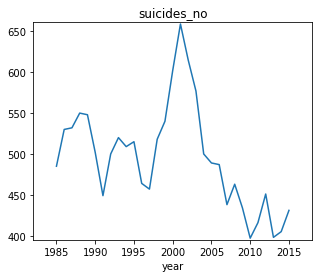

Men range 15-24 year Australia 's suicides_no


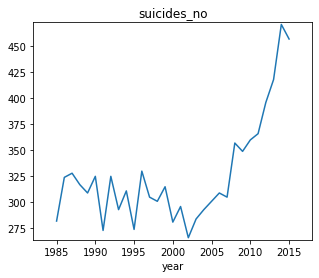

Men range 15-24 year Austria 's suicides_no


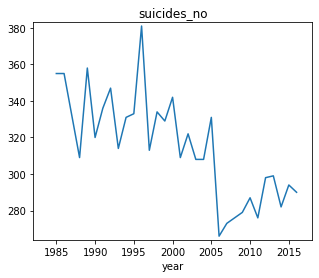

Men range 15-24 year Barbados 's suicides_no


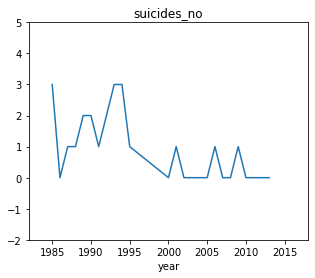

Men range 15-24 year Belgium 's suicides_no


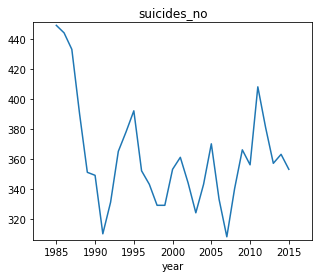

Men range 15-24 year Brazil 's suicides_no


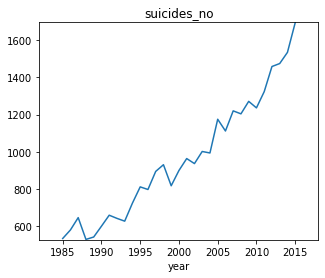

Men range 15-24 year Bulgaria 's suicides_no


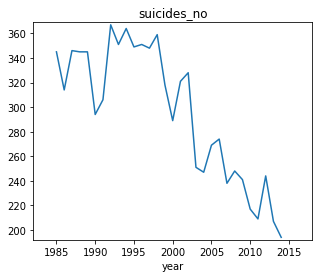

Men range 15-24 year Canada 's suicides_no


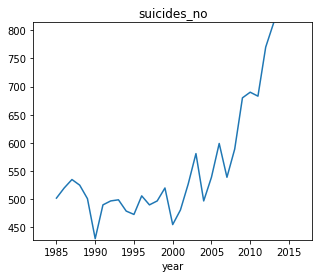

Men range 15-24 year Chile 's suicides_no


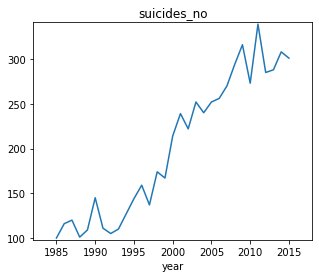

Men range 15-24 year Colombia 's suicides_no


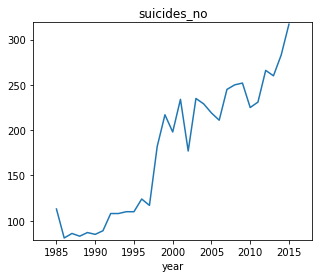

Men range 15-24 year Costa Rica 's suicides_no


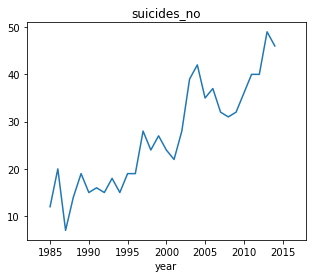

Men range 15-24 year Ecuador 's suicides_no


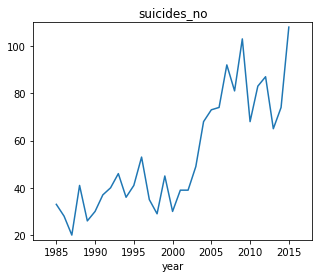

Men range 15-24 year France 's suicides_no


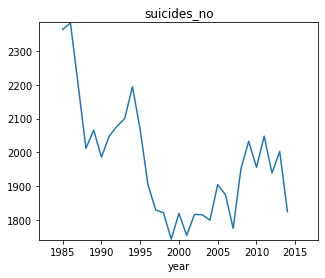

Men range 15-24 year Greece 's suicides_no


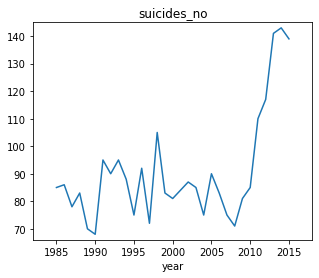

Men range 15-24 year Grenada 's suicides_no


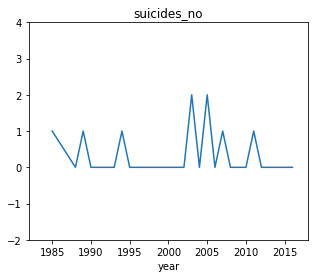

Men range 15-24 year Iceland 's suicides_no


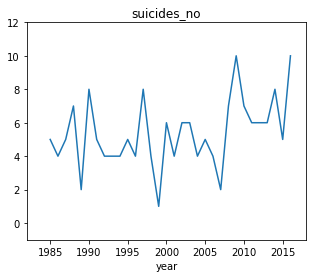

Men range 15-24 year Ireland 's suicides_no


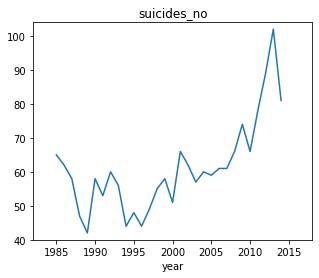

Men range 15-24 year Israel 's suicides_no


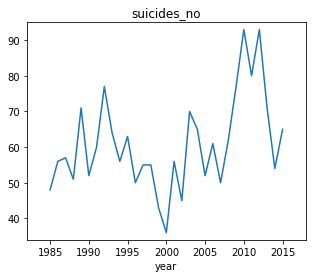

Men range 15-24 year Italy 's suicides_no


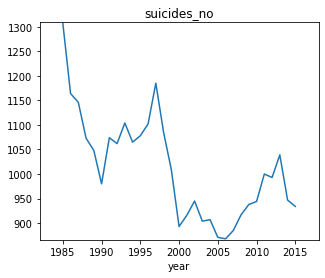

Men range 15-24 year Japan 's suicides_no


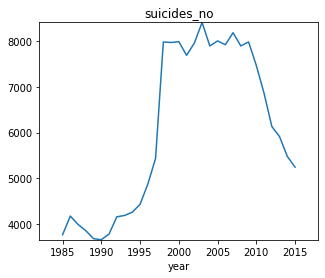

Men range 15-24 year Kuwait 's suicides_no


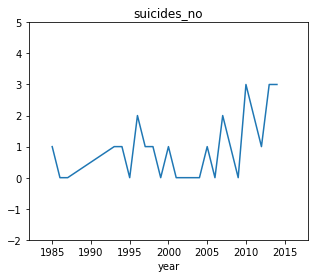

Men range 15-24 year Luxembourg 's suicides_no


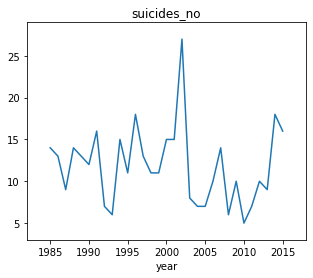

Men range 15-24 year Malta 's suicides_no


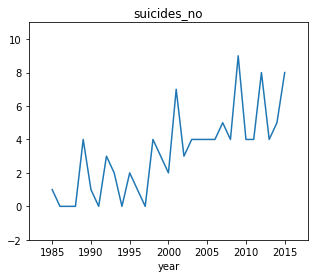

Men range 15-24 year Mauritius 's suicides_no


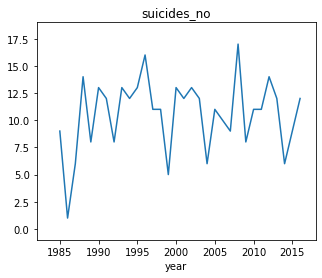

Men range 15-24 year Mexico 's suicides_no


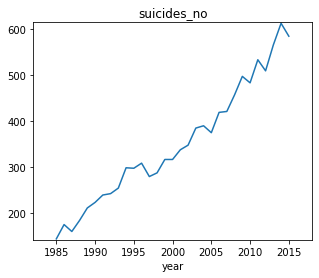

Men range 15-24 year Netherlands 's suicides_no


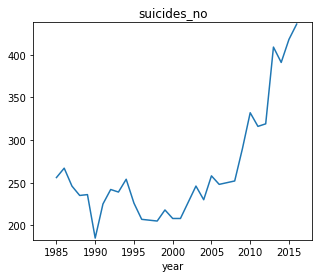

Men range 15-24 year New Zealand 's suicides_no


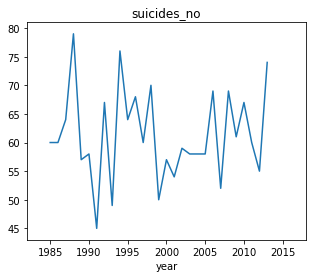

Men range 15-24 year Panama 's suicides_no


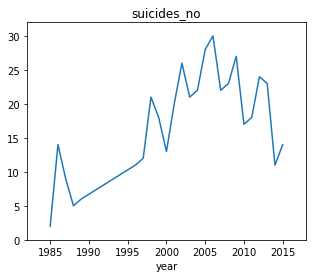

Men range 15-24 year Paraguay 's suicides_no


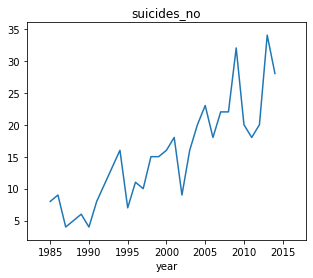

Men range 15-24 year Portugal 's suicides_no


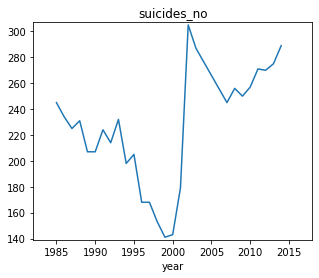

Men range 15-24 year Puerto Rico 's suicides_no


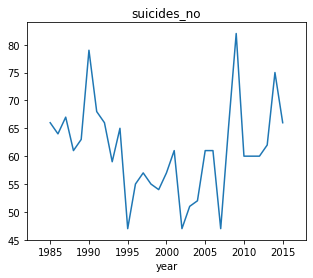

Men range 15-24 year Republic of Korea 's suicides_no


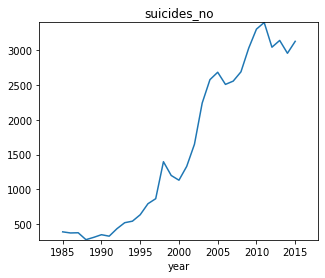

Men range 15-24 year Saint Vincent and Grenadines 's suicides_no


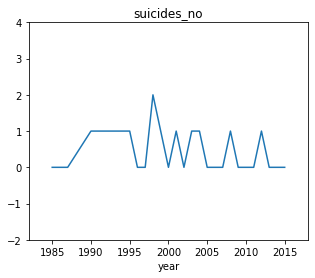

Men range 15-24 year Singapore 's suicides_no


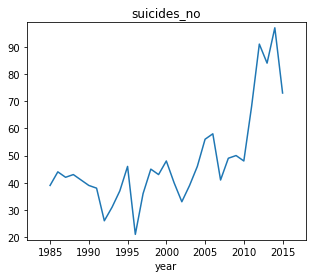

Men range 15-24 year Spain 's suicides_no


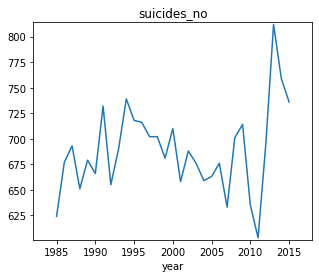

Men range 15-24 year Suriname 's suicides_no


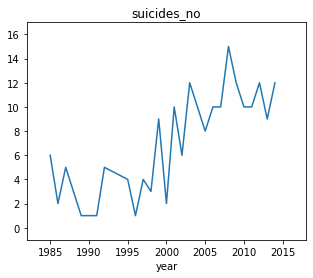

Men range 15-24 year Thailand 's suicides_no


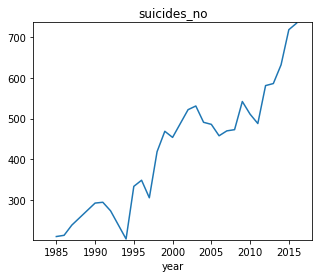

Men range 15-24 year Trinidad and Tobago 's suicides_no


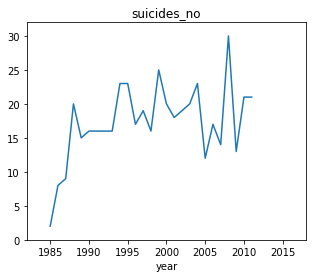

Men range 15-24 year United Kingdom 's suicides_no


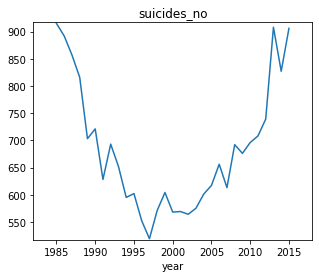

Men range 15-24 year United States 's suicides_no


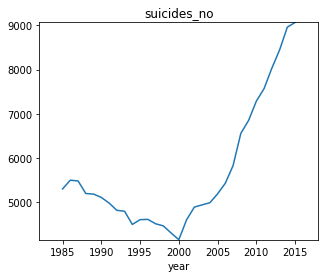

Men range 15-24 year Uruguay 's suicides_no


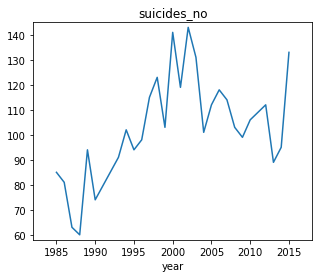

Men range 15-24 year Belize 's suicides_no


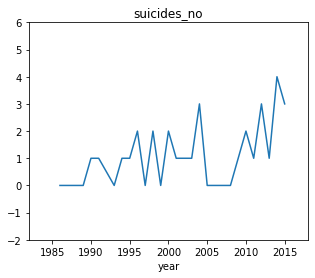

Men range 15-24 year Guatemala 's suicides_no


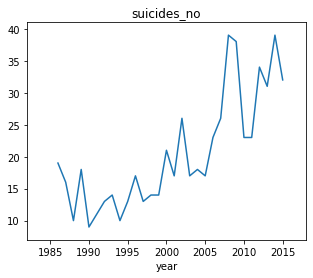

Men range 15-24 year Norway 's suicides_no


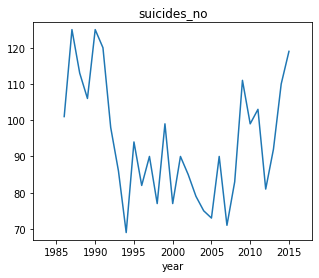

Men range 15-24 year Saint Lucia 's suicides_no


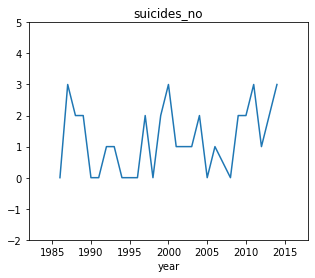

Men range 15-24 year Finland 's suicides_no


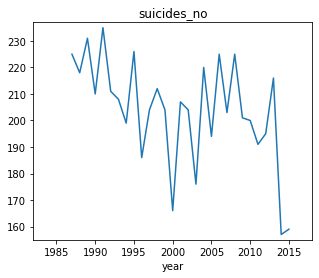

Men range 15-24 year Sweden 's suicides_no


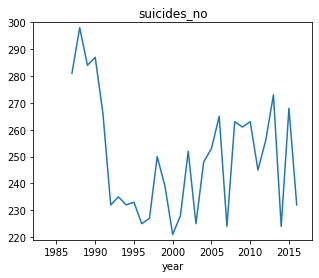

Men range 15-24 year Guyana 's suicides_no


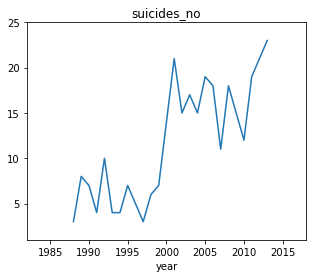

Men range 15-24 year Ukraine 's suicides_no


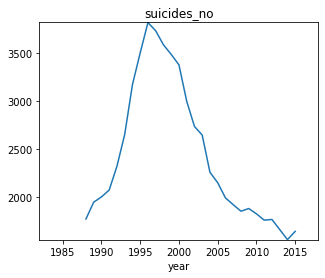

Men range 15-24 year Romania 's suicides_no


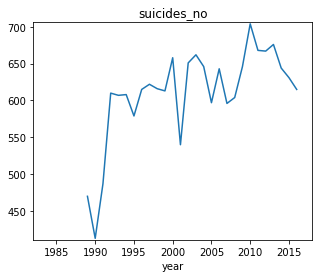

Men range 15-24 year Russian Federation 's suicides_no


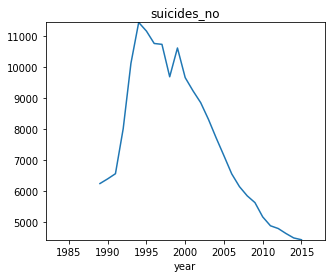

Men range 15-24 year Armenia 's suicides_no


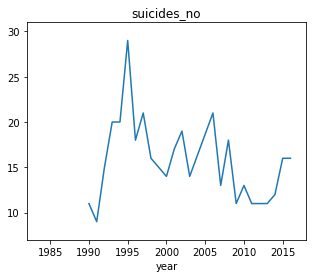

Men range 15-24 year Czech Republic 's suicides_no


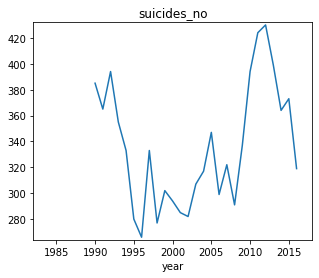

Men range 15-24 year Germany 's suicides_no


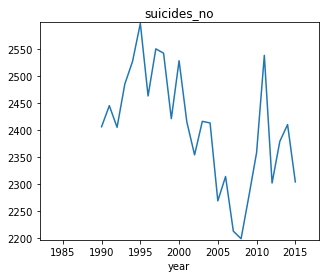

Men range 15-24 year Kazakhstan 's suicides_no


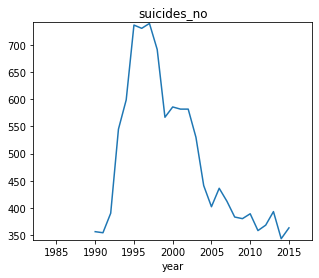

Men range 15-24 year Kyrgyzstan 's suicides_no


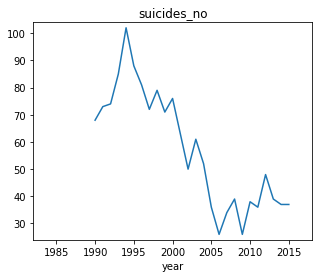

Men range 15-24 year Hungary 's suicides_no


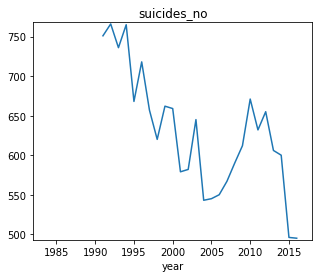

In [ ]:
# For male
for s in country:

    for t in targets:
      print("Men range 15-24 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()




Women  Argentina 's suicides_no


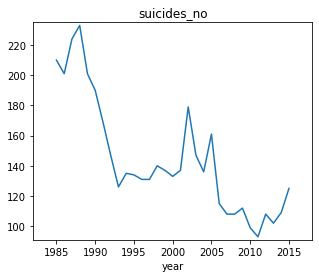

Women  Australia 's suicides_no


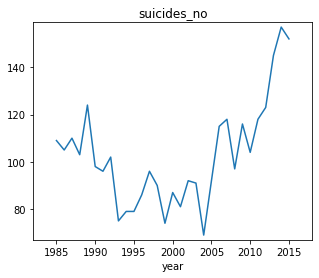

Women  Austria 's suicides_no


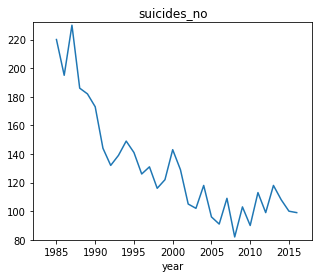

Women  Barbados 's suicides_no


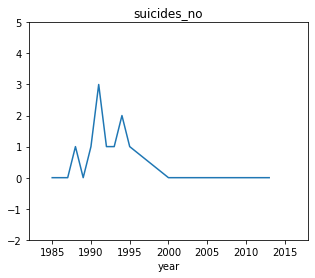

Women  Belgium 's suicides_no


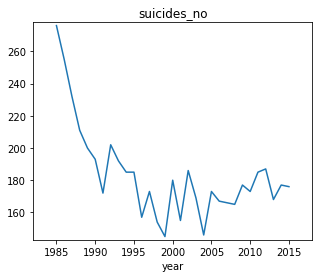

Women  Brazil 's suicides_no


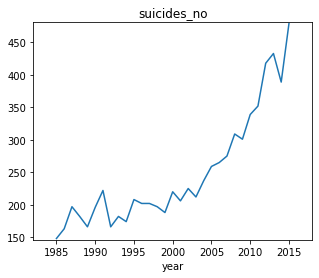

Women  Bulgaria 's suicides_no


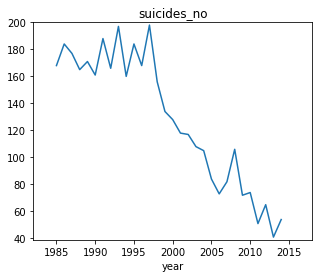

Women  Canada 's suicides_no


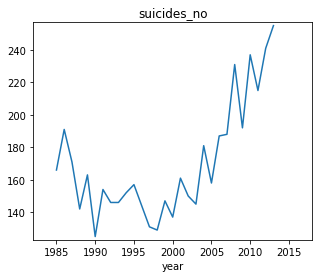

Women  Chile 's suicides_no


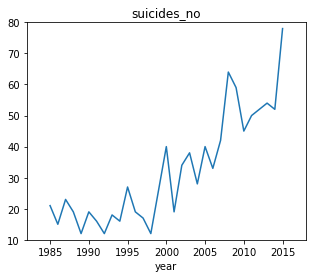

Women  Colombia 's suicides_no


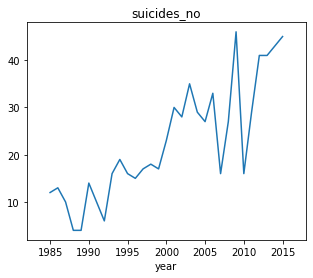

Women  Costa Rica 's suicides_no


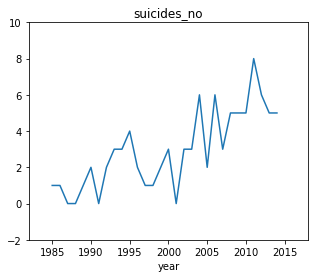

Women  Ecuador 's suicides_no


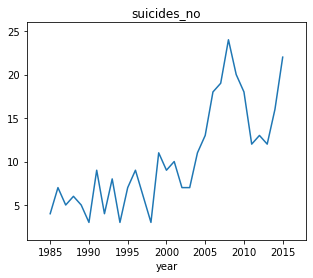

Women  France 's suicides_no


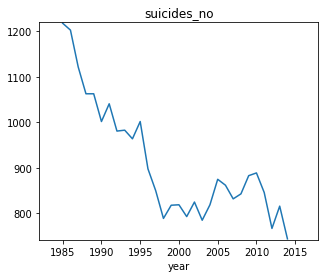

Women  Greece 's suicides_no


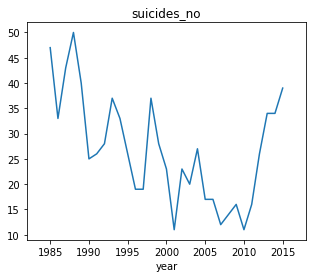

Women  Grenada 's suicides_no


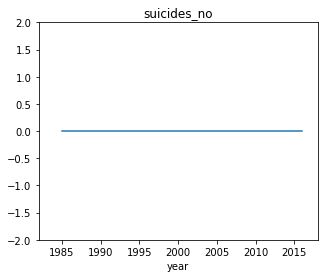

Women  Iceland 's suicides_no


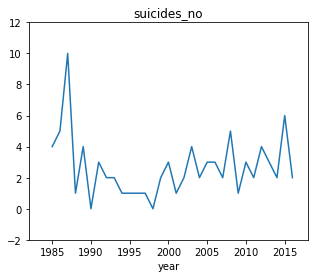

Women  Ireland 's suicides_no


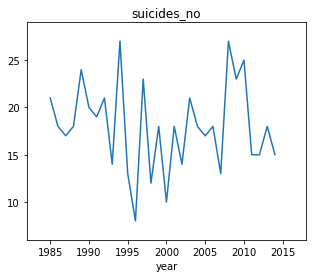

Women  Israel 's suicides_no


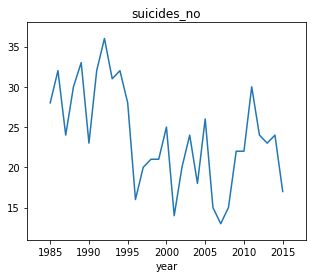

Women  Italy 's suicides_no


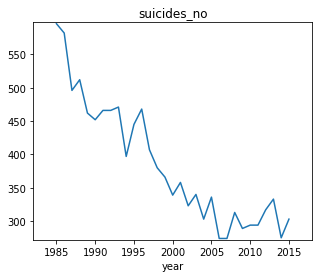

Women  Japan 's suicides_no


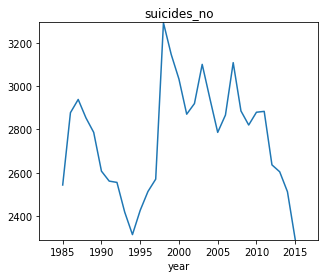

Women  Kuwait 's suicides_no


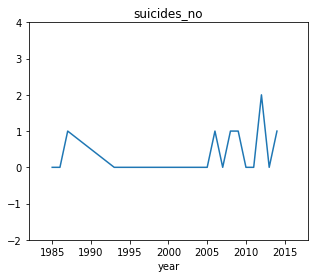

Women  Luxembourg 's suicides_no


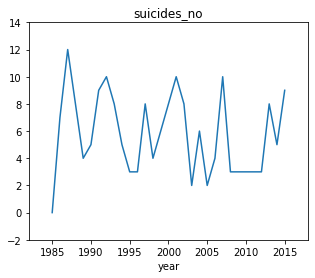

Women  Malta 's suicides_no


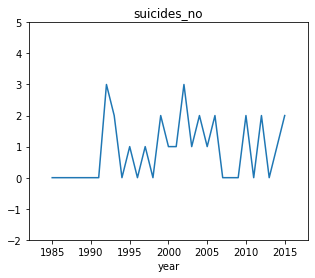

Women  Mauritius 's suicides_no


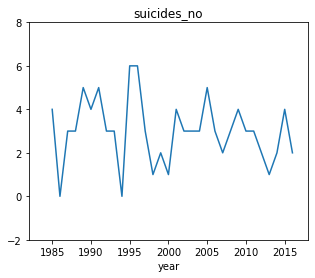

Women  Mexico 's suicides_no


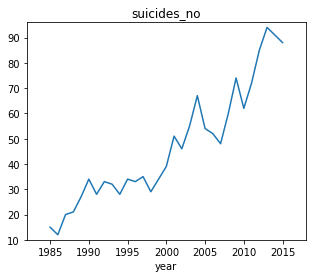

Women  Netherlands 's suicides_no


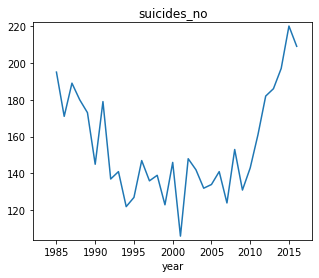

Women  New Zealand 's suicides_no


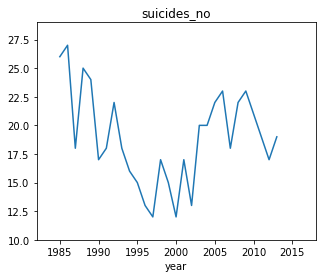

Women  Panama 's suicides_no


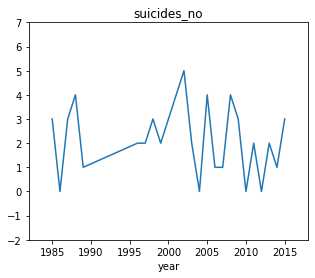

Women  Paraguay 's suicides_no


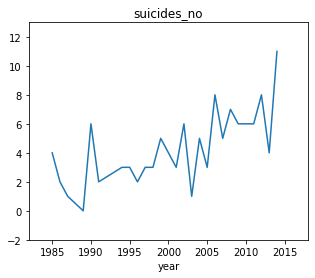

Women  Portugal 's suicides_no


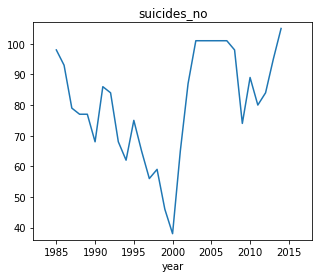

Women  Puerto Rico 's suicides_no


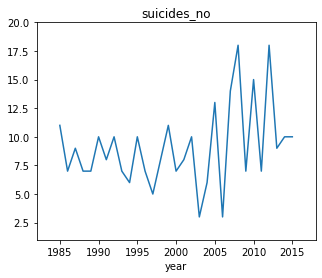

Women  Republic of Korea 's suicides_no


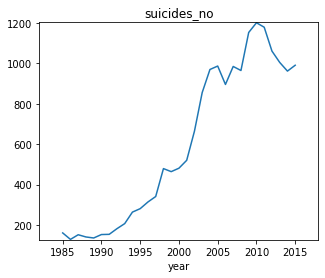

Women  Saint Vincent and Grenadines 's suicides_no


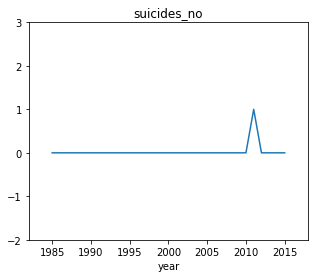

Women  Singapore 's suicides_no


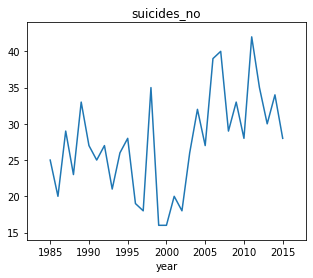

Women  Spain 's suicides_no


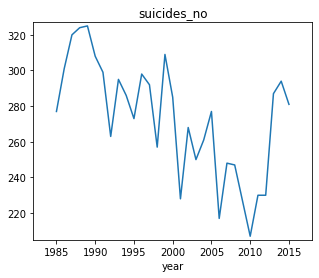

Women  Suriname 's suicides_no


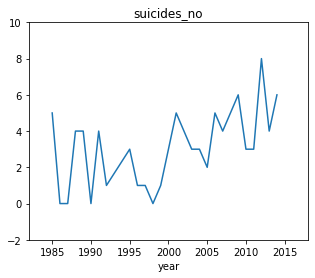

Women  Thailand 's suicides_no


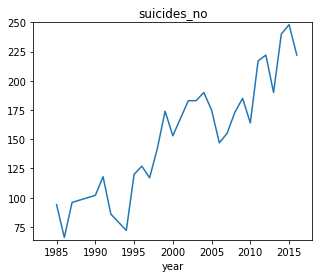

Women  Trinidad and Tobago 's suicides_no


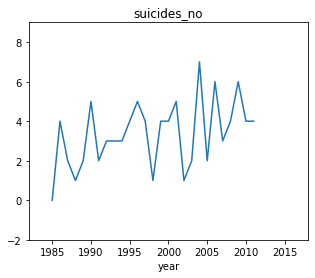

Women  United Kingdom 's suicides_no


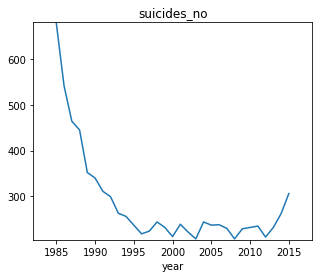

Women  United States 's suicides_no


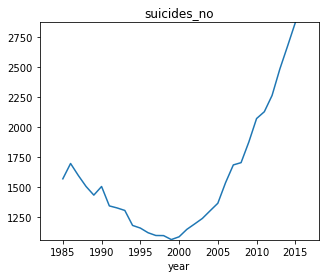

Women  Uruguay 's suicides_no


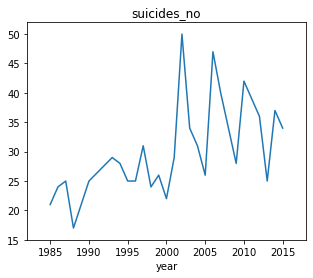

Women  Belize 's suicides_no


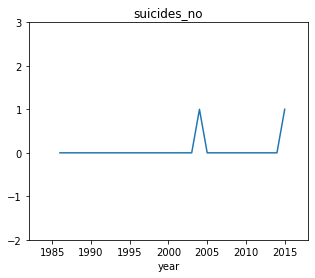

Women  Guatemala 's suicides_no


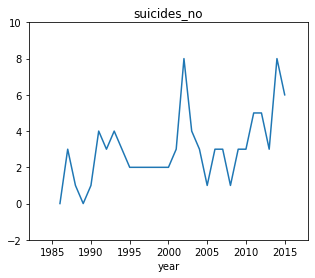

Women  Norway 's suicides_no


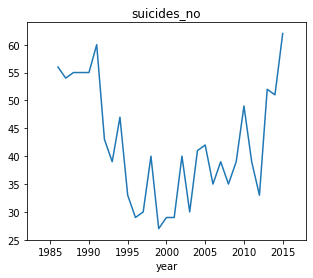

Women  Saint Lucia 's suicides_no


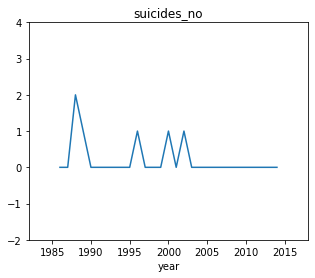

Women  Finland 's suicides_no


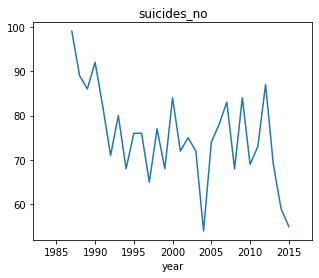

Women  Sweden 's suicides_no


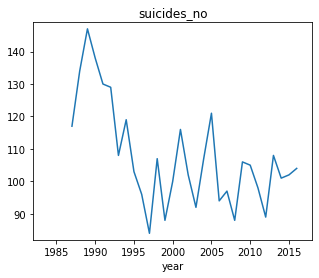

Women  Guyana 's suicides_no


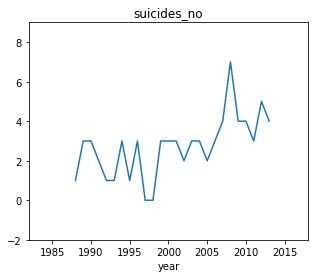

Women  Ukraine 's suicides_no


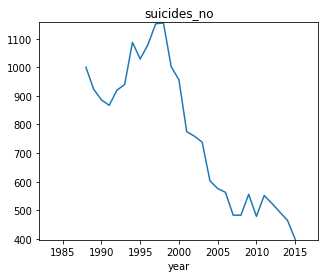

Women  Romania 's suicides_no


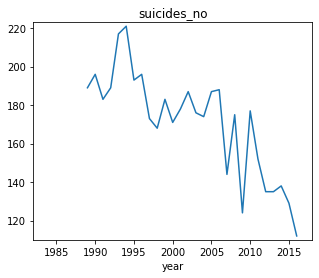

Women  Russian Federation 's suicides_no


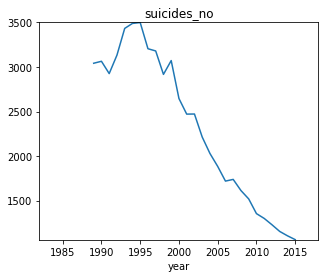

Women  Armenia 's suicides_no


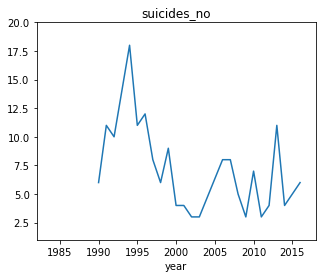

Women  Czech Republic 's suicides_no


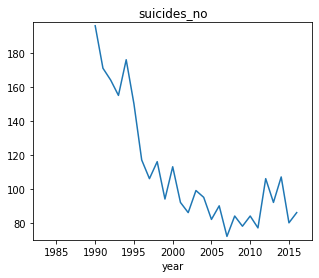

Women  Germany 's suicides_no


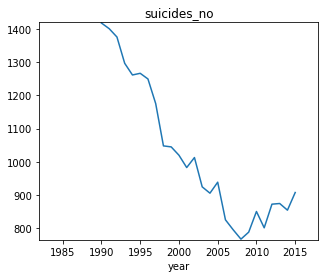

Women  Kazakhstan 's suicides_no


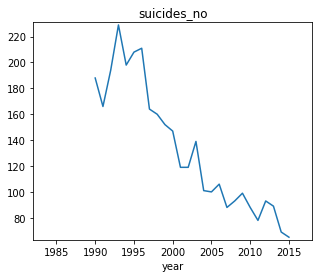

Women  Kyrgyzstan 's suicides_no


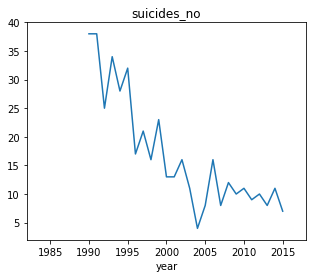

Women  Hungary 's suicides_no


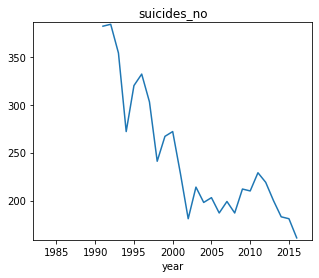

In [ ]:
# For female
for s in fecountry:

    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()


### 1 B. Plot the suicide time series for all countries.

In [1]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)

pivot_test_fem

NameError: ignored

In [ ]:
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina    Armenia  ...  United States     Uruguay
year                           ...                           
1985         485.0  11.000000  ...         5302.0   85.000000
1986         530.0  11.000000  ...         5500.0   81.000000
1987         532.0  11.000000  ...         5482.0   63.000000
1988         550.0  11.000000  ...         5198.0   60.000000
1989         548.0  11.000000  ...         5185.0   94.000000
1990         502.0  11.000000  ...         5109.0   74.000000
1991         449.0   9.000000  ...         4983.0   79.666667
1992         500.0  15.000000  ...         4818.0   85.333333
1993         520.0  20.000000  ...         4797.0   91.000000
1994         509.0  20.000000  ...         4498.0  102.000000
1995         515.0  29.000000  ...         4607.0   94.000000
1996         464.0  18.000000  ...         4613.0   98.000000
1997         457.0  21.000000  ...         4514.0  115.000000
1998         518.0  16.000000  ...         4466.0  123.000000
1999         540.0  15.000000  ...         4306.0  103.000000
2000         602.0  14.000000  ...         4153.0  141.000000
2001         659.0  17.000000  ...         4603.0  119.000000
2002         615.0  19.000000  ...         4890.0  143.000000
2003         577.0  14.000000  ...         4941.0  131.000000
2004         500.0  16.333333  ...         4989.0  101.000000
2005         489.0  18.666667  ...         5190.0  112.000000
2006         487.0  21.000000  ...         5431.0  118.000000
2007         438.0  13.000000  ...         5830.0  114.000000
2008         463.0  18.000000  ...         6558.0  103.000000
2009         434.0  11.000000  ...         6851.0   99.000000
2010         397.0  13.000000  ...         7287.0  106.000000
2011         416.0  11.000000  ...         7572.0  109.000000
2012         451.0  11.000000  ...         8032.0  112.000000
2013         398.0  11.000000  ...         8445.0   89.000000
2014         405.0  12.000000  ...         8961.0   95.000000
2015         431.0  16.000000  ...         9068.0  133.000000
2016         431.0  16.000000  ...         9068.0  133.000000

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina    Armenia  ...  United States    Uruguay
year                           ...                          
1985         210.0   6.000000  ...         1568.0  21.000000
1986         201.0   6.000000  ...         1696.0  24.000000
1987         224.0   6.000000  ...         1596.0  25.000000
1988         233.0   6.000000  ...         1504.0  17.000000
1989         201.0   6.000000  ...         1432.0  21.000000
1990         190.0   6.000000  ...         1504.0  25.000000
1991         169.0  11.000000  ...         1342.0  26.333333
1992         147.0  10.000000  ...         1325.0  27.666667
1993         126.0  14.000000  ...         1304.0  29.000000
1994         135.0  18.000000  ...         1179.0  28.000000
1995         134.0  11.000000  ...         1157.0  25.000000
1996         131.0  12.000000  ...         1118.0  25.000000
1997         131.0   8.000000  ...         1095.0  31.000000
1998         140.0   6.000000  ...         1094.0  24.000000
1999         137.0   9.000000  ...         1061.0  26.000000
2000         133.0   4.000000  ...         1084.0  22.000000
2001         137.0   4.000000  ...         1146.0  29.000000
2002         179.0   3.000000  ...         1191.0  50.000000
2003         147.0   3.000000  ...         1237.0  34.000000
2004         136.0   4.666667  ...         1301.0  31.000000
2005         161.0   6.333333  ...         1364.0  26.000000
2006         115.0   8.000000  ...         1536.0  47.000000
2007         108.0   8.000000  ...         1684.0  40.000000
2008         108.0   5.000000  ...         1703.0  34.000000
2009         112.0   3.000000  ...         1875.0  28.000000
2010          99.0   7.000000  ...         2071.0  42.000000
2011          93.0   3.000000  ...         2128.0  39.000000
2012         108.0   4.000000  ...         2264.0  36.000000
2013         102.0  11.000000  ...         2484.0  25.000000
2014         109.0   4.000000  ...         2676.0  37.000000
2015         125.0   5.000000  ...         2872.0  34.000000
2016         125.0   6.000000  ...         2872.0  34.000000

[32 rows x 57 columns]

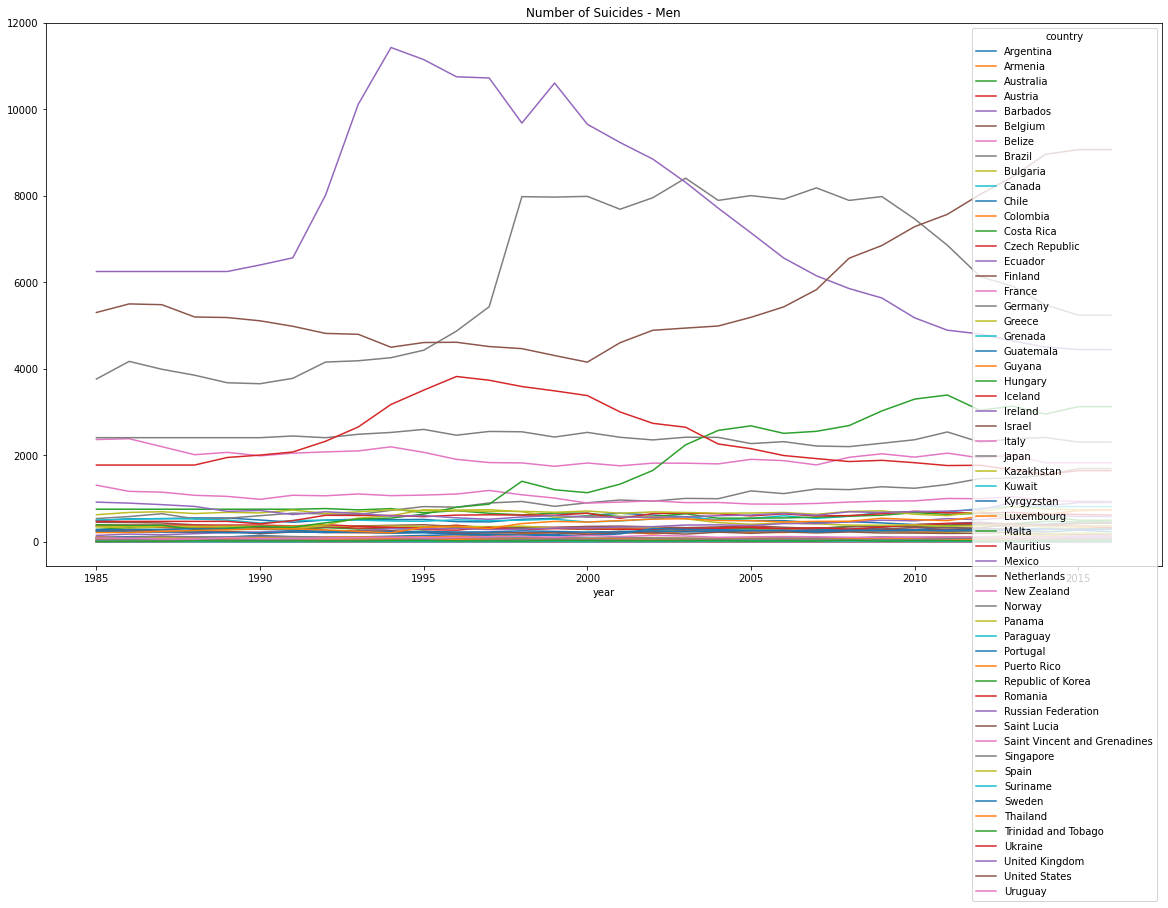

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

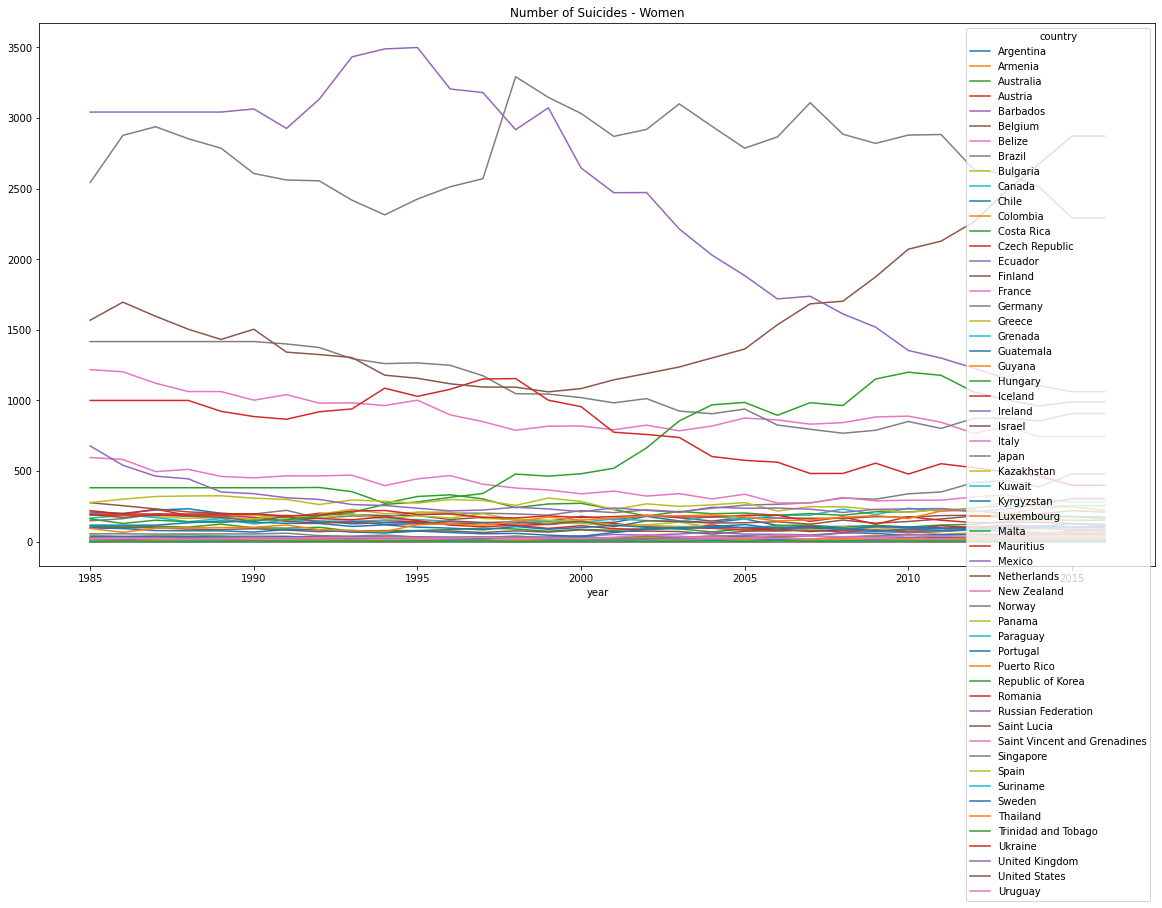

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance



In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[10  9 10 10  9 10  9  8 10  7 10 10  9 10  9 10  4  4  9  9  9  9  7  9
  9  9  8  1 10  9  9  9  9  9 10 10  9  9  9  9 10  9  6  7  3  9  9  9
  7  9 10 10  9  5  7  2  9]
Cluster 10 number of entries 15


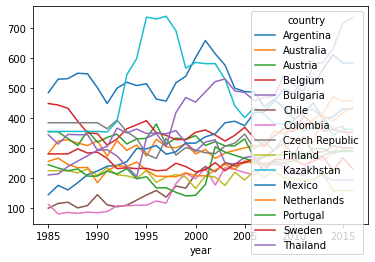

Cluster 9 number of entries 28


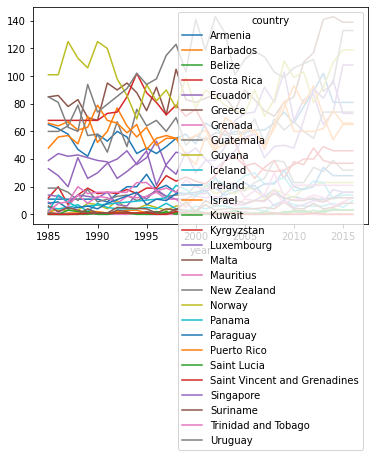

Cluster 8 number of entries 2


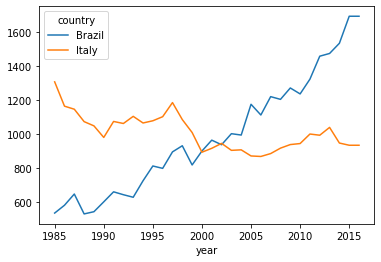

Cluster 7 number of entries 5


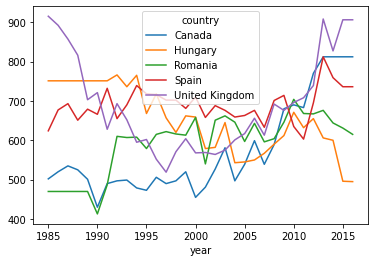

Cluster 4 number of entries 2


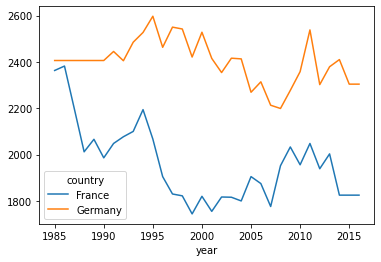

Cluster 1 number of entries 1


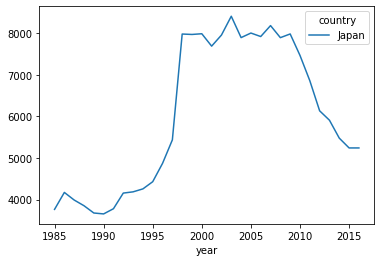

Cluster 6 number of entries 1


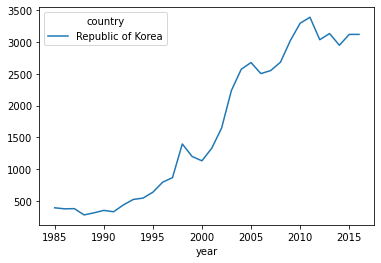

Cluster 3 number of entries 1


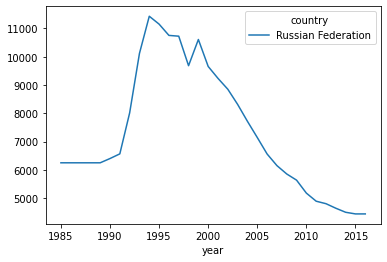

Cluster 5 number of entries 1


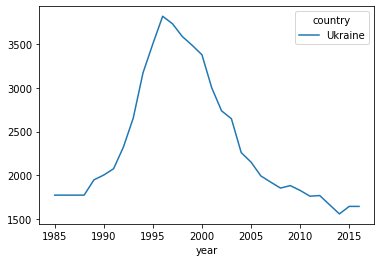

Cluster 2 number of entries 1


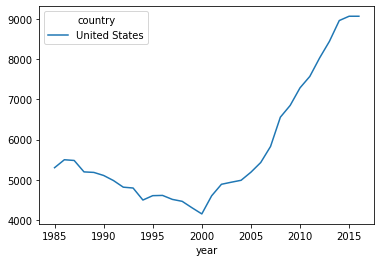

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 3  1  3  3  1  3  1  3  3  3  1  1  1  3  1  3  6  7  1  1  1  1  2  1
  1  1  2  4  3  1  1  1  1  1  1  3  1  1  1  1  3  1  9  3  5  1  1  1
  2  1  3  3  1  8  2 10  1]
Cluster 3 number of entries 15


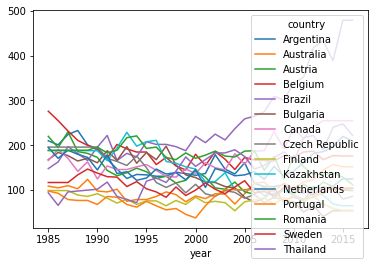

Cluster 1 number of entries 31


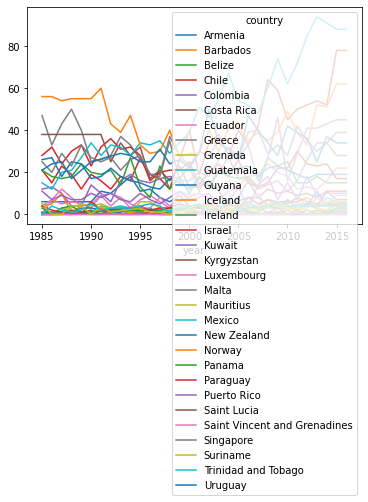

Cluster 6 number of entries 1


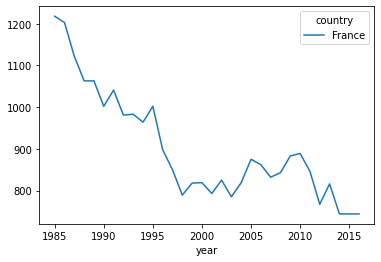

Cluster 7 number of entries 1


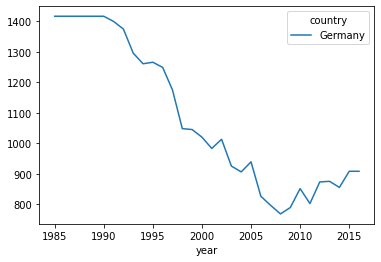

Cluster 2 number of entries 4


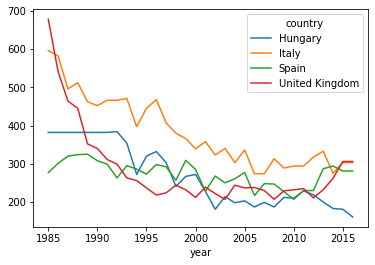

Cluster 4 number of entries 1


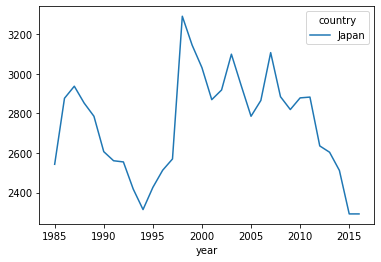

Cluster 9 number of entries 1


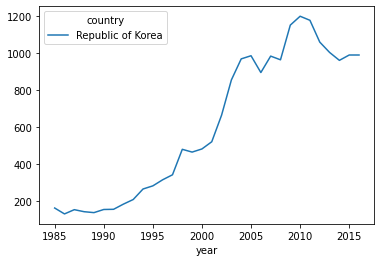

Cluster 5 number of entries 1


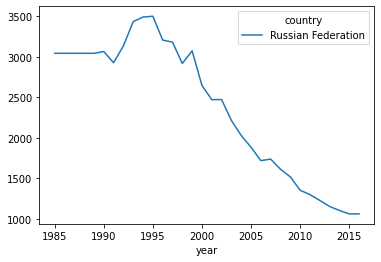

Cluster 8 number of entries 1


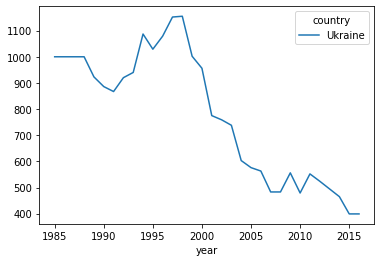

Cluster 10 number of entries 1


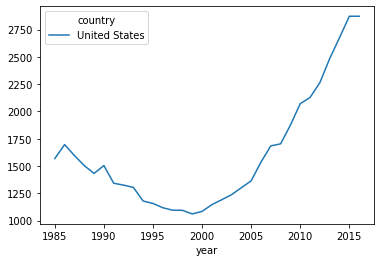

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

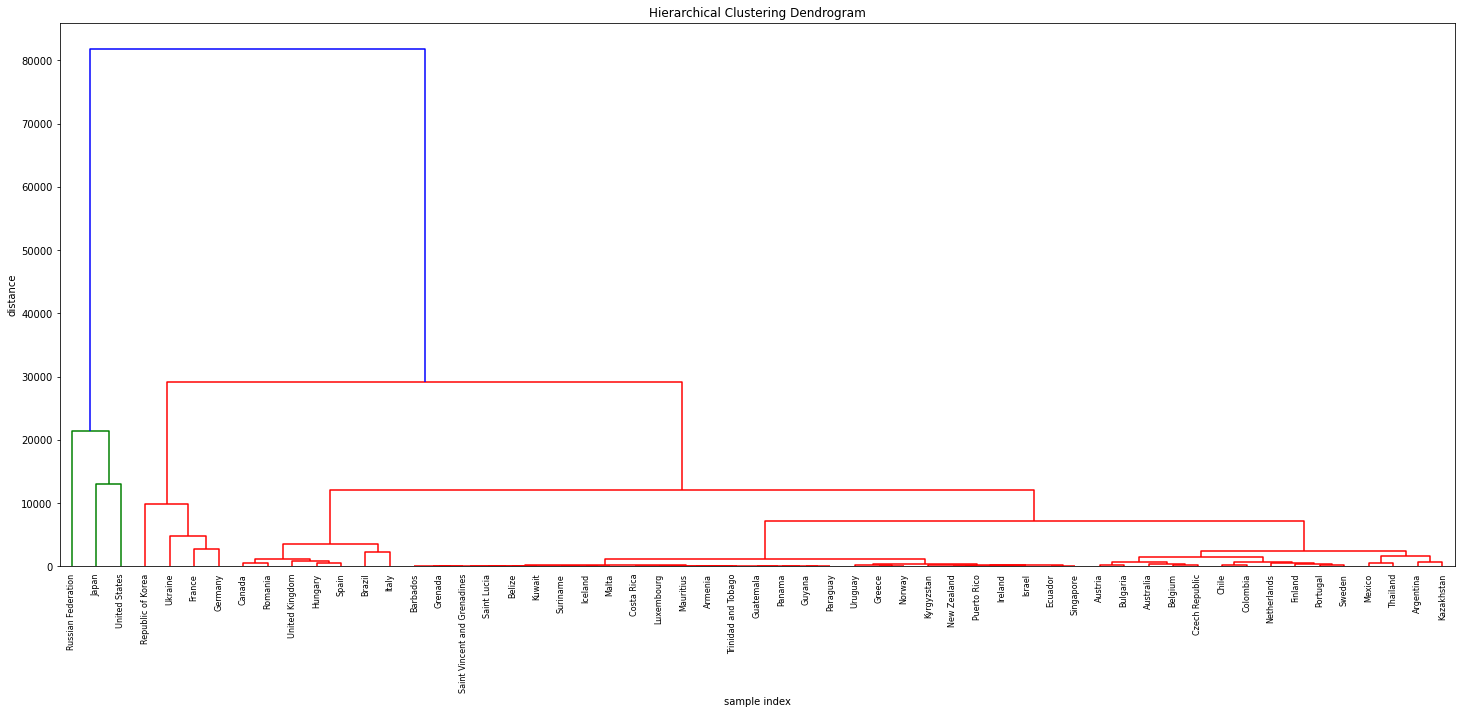

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

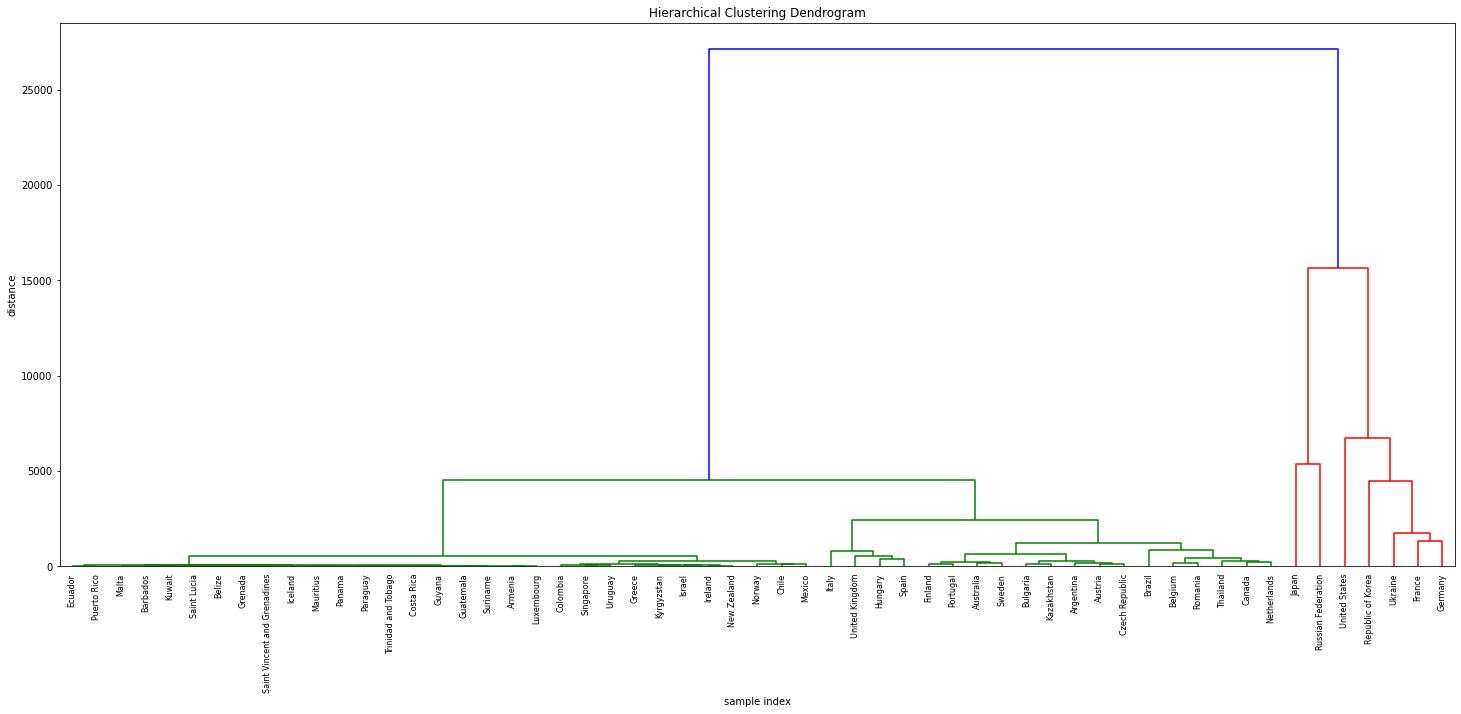

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


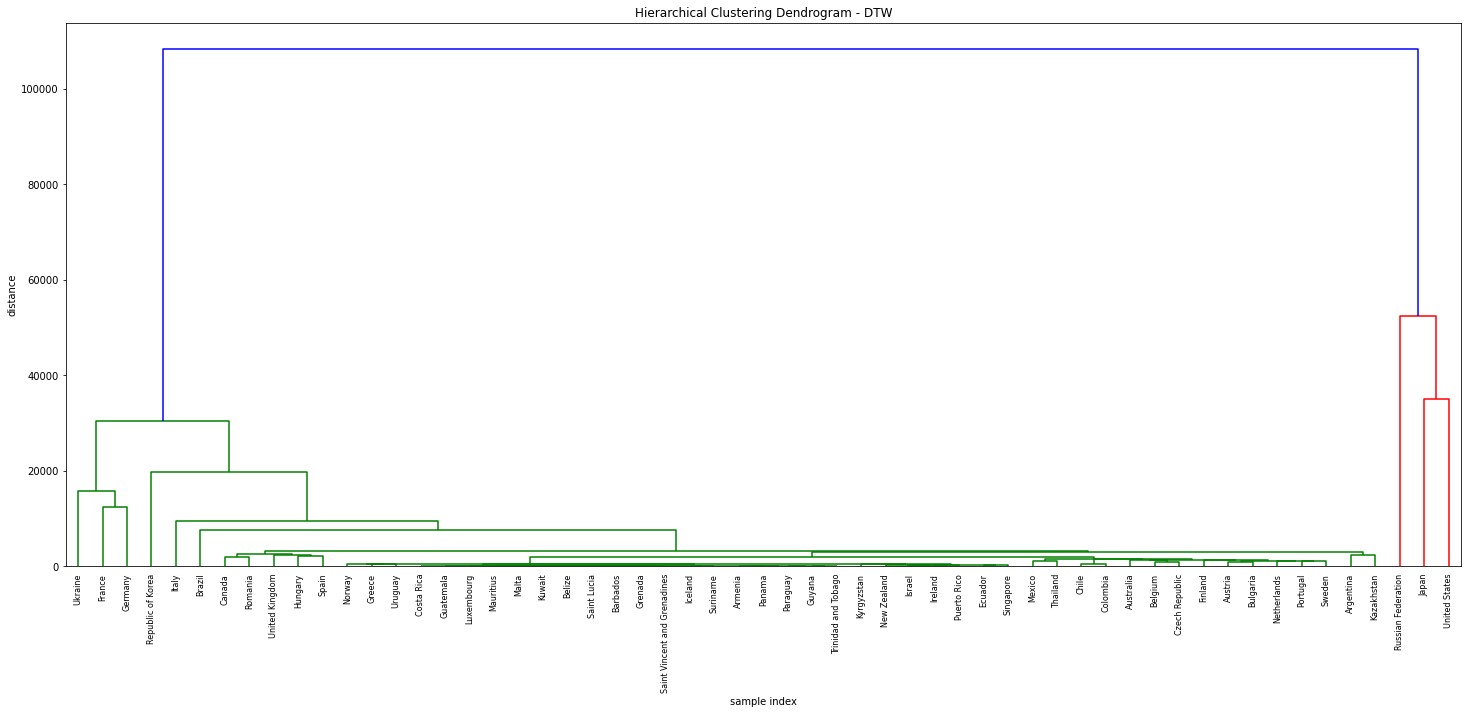

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

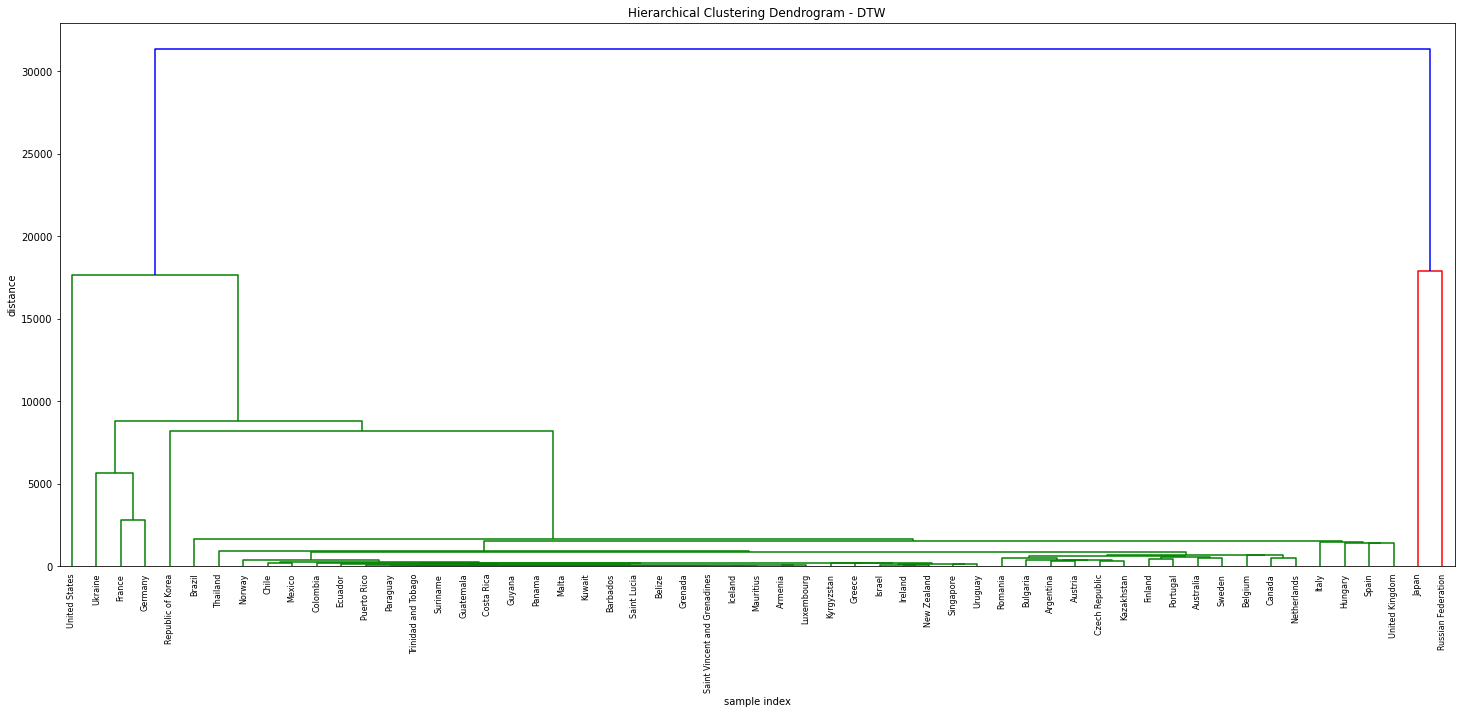

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-DTW:

Same thing as the other two. There is a cluster that has 28 states, which is almost all of them.
With this type of visualization, we can also see which states are the ones that behave differently.

[ 4  4  4  4  4  4  4  5  4  4  4  4  4  4  4  4  1  2  4  4  4  4  4  4
  4  4  6  8  4  4  4  4  4  4  4  4  4  4  4  4  4  4  7  4 10  4  4  4
  4  4  4  4  4  3  4  9  4]
Cluster 4 number of entries 48


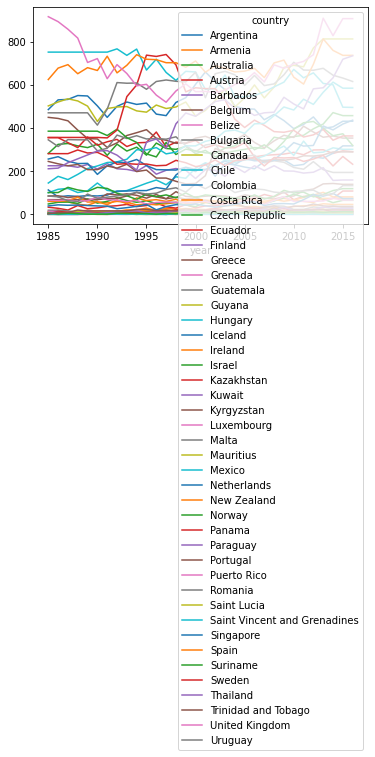

Cluster 5 number of entries 1


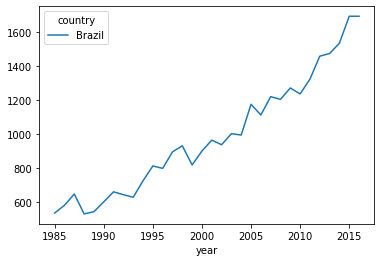

Cluster 1 number of entries 1


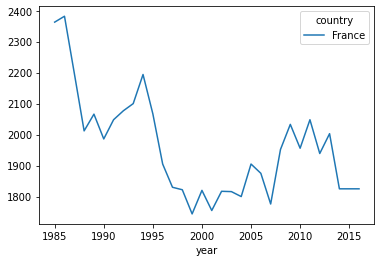

Cluster 2 number of entries 1


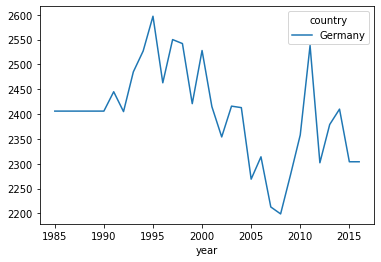

Cluster 6 number of entries 1


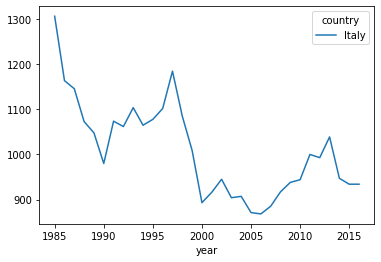

Cluster 8 number of entries 1


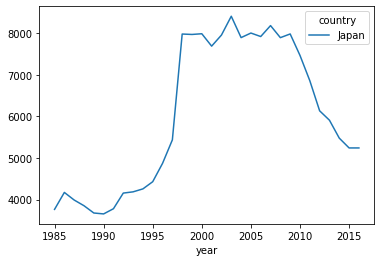

Cluster 7 number of entries 1


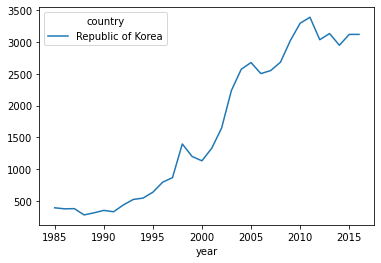

Cluster 10 number of entries 1


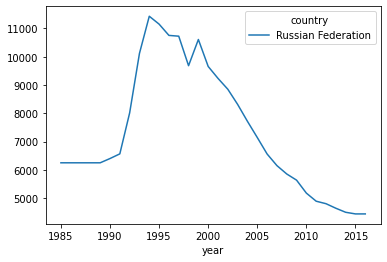

Cluster 3 number of entries 1


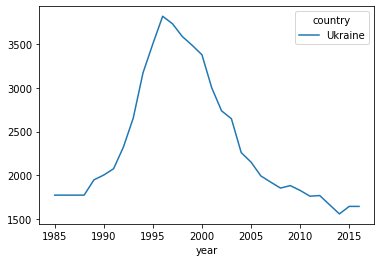

Cluster 9 number of entries 1


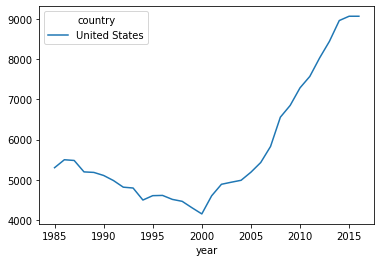

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 4  4  4  4  4  4  4  6  4  4  4  4  4  4  4  4  1  2  4  4  4  4  5  4
  4  4  5  9  4  4  4  4  4  4  4  4  4  4  4  4  4  4  7  4 10  4  4  4
  5  4  4  4  4  3  5  8  4]
Cluster 4 number of entries 45


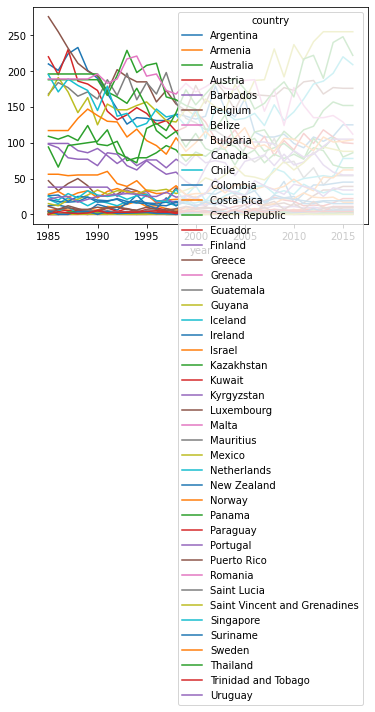

Cluster 6 number of entries 1


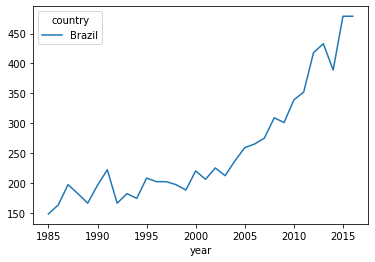

Cluster 1 number of entries 1


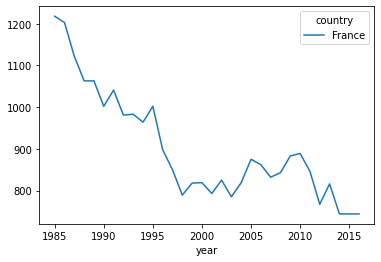

Cluster 2 number of entries 1


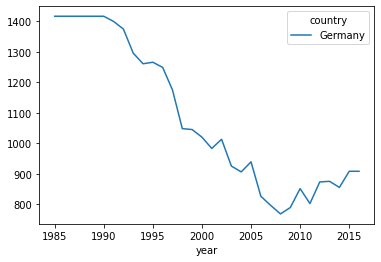

Cluster 5 number of entries 4


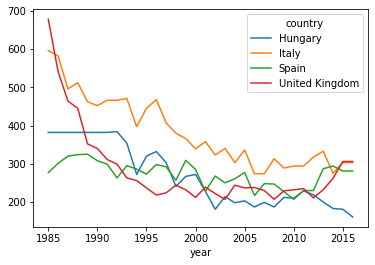

Cluster 9 number of entries 1


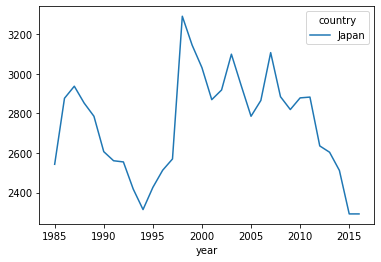

Cluster 7 number of entries 1


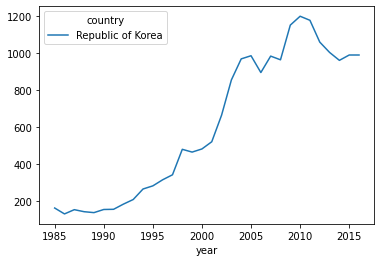

Cluster 10 number of entries 1


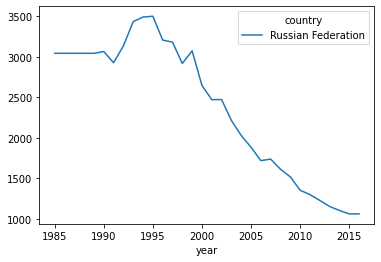

Cluster 3 number of entries 1


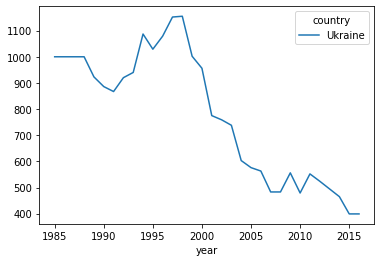

Cluster 8 number of entries 1


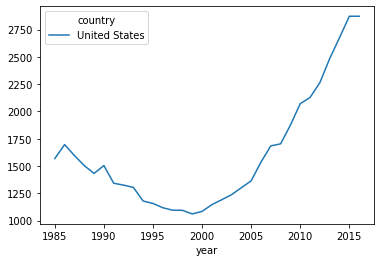

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)